In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import re
import pdb
import numpy as np
%matplotlib inline

### 样例

In [2]:
!cat My_output/data_bro.txt

Total BFLOPS 65.290 

 seen 64 
Enter Image Path: data/dms_hand_2/data_bro/0.jpg: Predicted in 0.000000 milli-seconds.
Enter Image Path: data/dms_hand_2/data_bro/1.jpg: Predicted in 0.000000 milli-seconds.
Enter Image Path: data/dms_hand_2/data_bro/2.jpg: Predicted in 0.000000 milli-seconds.
Enter Image Path: data/dms_hand_2/data_bro/3.jpg: Predicted in 0.000000 milli-seconds.
Enter Image Path: data/dms_hand_2/data_bro/4.jpg: Predicted in 0.000000 milli-seconds.
Enter Image Path: data/dms_hand_2/data_bro/5.jpg: Predicted in 0.000000 milli-seconds.
Enter Image Path: data/dms_hand_2/data_bro/6.jpg: Predicted in 0.000000 milli-seconds.
Enter Image Path: data/dms_hand_2/data_bro/7.jpg: Predicted in 0.000000 milli-seconds.
Enter Image Path: data/dms_hand_2/data_bro/8.jpg: Predicted in 0.000000 milli-seconds.
Enter Image Path: data/dms_hand_2/data_bro/9.jpg: Predicted in 0.000000 milli-seconds.
Enter Image Path: data/dms_hand_2/data_bro/10.jpg: Predicted in 0.000000 milli-seconds.
Enter Imag

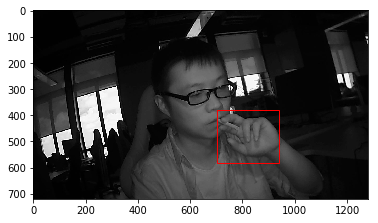

In [3]:
img = cv2.imread('data/dms_hand_2/data_bro/100.jpg',0)
plt.imshow(img,'gray')
plt.gca().add_patch(plt.Rectangle((702,380),238,202,fill=False,color='red'))
plt.show()

### 通过可视化检查预测情况

In [4]:
# 将yolo刷出的标注信息加载到列表中
with open('My_output/data_bro.txt','r') as f:
    annotations = f.readlines()

In [5]:
def draw_one_box(anno_line):
    numerical_info = re.findall(r"\d+", anno_line)
    numerical_info = [int(x) for x in numerical_info]
    confidence, box = numerical_info[0], numerical_info[1:]
    box = [box[0],box[1],box[0]+box[2],box[1]+box[3]]
    #box = adjust_bbox([box])[0]
    plt.gca().add_patch(plt.Rectangle((box[0], box[1]),box[2]-box[0],box[3]-box[1],fill=False,color='red'))
    plt.title('Hand: %{}'.format(confidence))
    
def adjust_bbox(bbox, img_h=1280, img_w=1280):
    '''
    调整原始hand box，向左、右、下扩充一定区域
    '''
    center = [((x[0]+x[2])/2,(x[1]+x[3])/2) for x in bbox]
    edge = [max(x[2]-x[0],x[3]-x[1])* 1.25 for x in bbox]
    left,top = [np.clip(c[0]-e/2, 0, img_w) for c,e in zip(center,edge)],[np.clip(c[1]-e/2*1.1, 0, img_h) for c,e in zip(center,edge)]
    right,bottom = [np.clip(c[0]+e/2, 0, img_w) for c,e in zip(center,edge)],[box[3] for box in bbox]
    # return [left[i],top[i],right[i],bottom[i] for i in range(len(bbox))]  #不支持
    bbox_new = []
    for i in range(len(bbox)):
        bbox_new.append([left[i],top[i],right[i],bottom[i]])
    assert(len(bbox_new)==len(bbox))
    return bbox_new

<IPython.core.display.Javascript object>


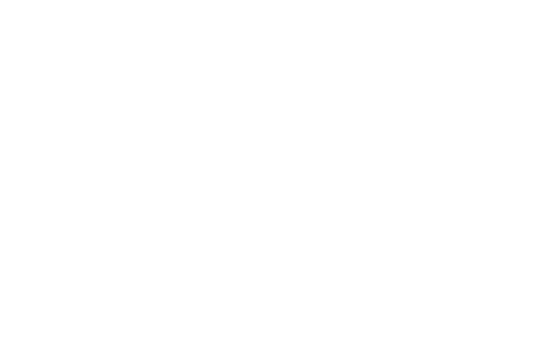

TypeError: Image data cannot be converted to float

<IPython.core.display.Javascript object>


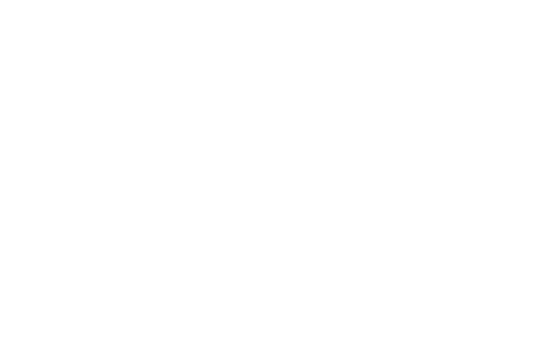

In [6]:
%matplotlib notebook
fig = plt.figure()
for i,anno in enumerate(annotations[400:]):
    i=i+400
    if anno[:5]=='Enter':
        plt.clf()
        img = cv2.imread(anno.split(':')[1][1:],0)
        plt.imshow(img,'gray')
        if annotations[i+1][:4]=='hand':
            draw_one_box(annotations[i+1])
            if annotations[i+2][:4]=='hand':
                draw_one_box(annotations[i+2])
        plt.show()

        fig.canvas.draw()
        plt.pause(0.05)

### 输出：扩大后的手部区域保存。得到一个测试集

In [43]:
CROPED_DIR = 'CROPED_DIR'

In [66]:
def save_one_box(img, img_name,  anno_line, box_id=None, resized_width=48, resized_height=48):
    numerical_info = re.findall(r"\d+", anno_line)
    numerical_info = [int(x) for x in numerical_info]
    confidence, box = numerical_info[0], numerical_info[1:]
    box = [box[0],box[1],box[0]+box[2],box[1]+box[3]]
    box = adjust_bbox([box])[0]
    box = [int(b) for b in box]
    cropped_img = img[box[1]:box[3],box[0]:box[2]]
    resized = cv2.resize(cropped_img, (resized_width, resized_height))
    if box_id is not None:
        cv2.imwrite(CROPED_DIR + '/' + str(box_id) + os.path.basename(img_name), resized)
    else:
        cv2.imwrite(CROPED_DIR + '/' + os.path.basename(img_name), resized)

In [67]:
for i,anno in enumerate(annotations):
    if anno[:5]=='Enter':
        img_name = anno.split(':')[1][1:]
        img = cv2.imread(img_name, 0)
        if annotations[i+1][:4]=='hand':
            save_one_box(img, img_name, annotations[i+1])
            if annotations[i+2][:4]=='hand':
                save_one_box(img, img_name, annotations[i+2], box_id=2)
print('[+]Cropping Done![+]')

IndexError: list index out of range

### 实验区

In [ ]:
for i,anno in enumerate(annotations):
    if annotations[i-1][:5]=='Enter' and anno[:4]=='hand':
        print("detected! {}".format(annotations[i-1].split(':')[1]))

In [15]:
print(annotations[-10])
re.findall(r"\d+",annotations[-10])

hand: 41%	(left_x:  491   top_y:  119   width:  664   height:  402)



['41', '491', '119', '664', '402']